### Series de tiempo 


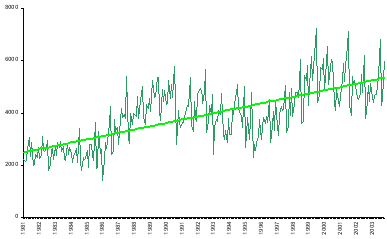

### ¿Qué es el IPC?

El Índice de Precios al Consumidor (IPC) es un indicador económico elaborado y publicado por el INE, que mide mes a mes la variación conjunta de los precios de una canasta de bienes y servicios representativa del consumo de los hogares del país. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_excel("ipc_cl.xlsx")

In [2]:
df.head()

,anio,mes,glosa,indice,variacion_mensual_prc,variacion_acumulada_prc,variacion_12mese_prc
0,2019,1,Alimentos,100.50,-0.3,-0.3,1.1
1,2019,1,Bienes,100.18,-0.1,-0.1,0.9
2,2019,1,Energía,99.27,-1.8,-1.8,2.6
3,2019,1,Frutas y verduras frescas,100.16,-2.7,-2.7,-1.7
4,2019,1,IPC General menos alimentos y energía,100.97,0.4,0.4,1.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anio                     504 non-null    int64  
 1   mes                      504 non-null    int64  
 2   glosa                    504 non-null    object 
 3   indice                   504 non-null    float64
 4   variacion_mensual_prc    504 non-null    float64
 5   variacion_acumulada_prc  504 non-null    float64
 6   variacion_12mese_prc     504 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.7+ KB


In [4]:
# Crear un índice DateTime
# Usar la función pd.to_datetime
# Input debe ser tipo string , si es entero lo interpretará como una fecha numérica.
# ¿cómo obtendría una expresión de fecha tipo string ?

# pd.to_datetime(df['anio']) # anio es entero, al hacer esto asume que todo el numero es una fecha, no es correcto. Primero hay que cambiar el tipo de dato a string

# pd.to_datetime(df['anio'].astype(str))  # aqui si lo asume como fecha.

# Concatenamos con el mes
# pd.to_datetime(df['anio'].astype(str) + ' ' + df['mes'].astype(str))

# Ahora le asignamos un nombre de variable:
df['anio_mes_time'] = pd.to_datetime(
    df['anio'].astype(str) + ' ' + df['mes'].astype(str))

/private/tmp/PKInstallSandbox.y5UqPW/tmp/ipykernel_8348/1552777283.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['anio_mes_time'] = pd.to_datetime(


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   anio                     504 non-null    int64         
 1   mes                      504 non-null    int64         
 2   glosa                    504 non-null    object        
 3   indice                   504 non-null    float64       
 4   variacion_mensual_prc    504 non-null    float64       
 5   variacion_acumulada_prc  504 non-null    float64       
 6   variacion_12mese_prc     504 non-null    float64       
 7   anio_mes_time            504 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 31.6+ KB


In [6]:
# Verificación (verifique que anio_mes_time es único por anio y mes y
# está correc)
# ¿cómo lograría ésto?

df.groupby(['anio', 'mes', 'anio_mes_time']).count()

glosa  indice  variacion_mensual_prc  \
anio mes anio_mes_time                                         
2019 1   2019-01-01         9       9                      9   
     2   2019-02-01         9       9                      9   
     3   2019-03-01         9       9                      9   
     4   2019-04-01         9       9                      9   
     5   2019-05-01         9       9                      9   
     6   2019-06-01         9       9                      9   
     7   2019-07-01         9       9                      9   
     8   2019-08-01         9       9                      9   
     9   2019-09-01         9       9                      9   
     10  2019-10-01         9       9                      9   
     11  2019-11-01         9       9                      9   
     12  2019-12-01         9       9                      9   
2020 1   2020-01-01         9       9                      9   
     2   2020-02-01         9       9                      9   
     3   2020-03-01         9       9                      9   
     4   2020-04-01         9       9                      9   
     5   2020-05-01         9       9                      9   
     6   2020-06-01         9       9                      9   
     7   2020-07-01         9       9                      9   
     8   2020-08-01         9       9                      9   
     9   2020-09-01         9       9                      9   
     10  2020-10-01         9       9                      9   
     11  2020-11-01         9       9                      9   
     12  2020-12-01         9       9                      9   
2021 1   2021-01-01         9       9                      9   
     2   2021-02-01         9       9                      9   
     3   2021-03-01         9       9                      9   
     4   2021-04-01         9       9                      9   
     5   2021-05-01         9       9                      9   
     6   2021-06-01         9       9                      9   
     7   2021-07-01         9       9                      9   
     8   2021-08-01         9       9                      9   
     9   2021-09-01         9       9                      9   
     10  2021-10-01         9       9                      9   
     11  2021-11-01         9       9                      9   
     12  2021-12-01         9       9                      9   
2022 1   2022-01-01         9       9                      9   
     2   2022-02-01         9       9                      9   
     3   2022-03-01         9       9                      9   
     4   2022-04-01         9       9                      9   
     5   2022-05-01         9       9                      9   
     6   2022-06-01         9       9                      9   
     7   2022-07-01         9       9                      9   
     8   2022-08-01         9       9                      9   
     9   2022-09-01         9       9                      9   
     10  2022-10-01         9       9                      9   
     11  2022-11-01         9       9                      9   
     12  2022-12-01         9       9                      9   
2023 1   2023-01-01         9       9                      9   
     2   2023-02-01         9       9                      9   
     3   2023-03-01         9       9                      9   
     4   2023-04-01         9       9                      9   
     5   2023-05-01         9       9                      9   
     6   2023-06-01         9       9                      9   
     7   2023-07-01         9       9                      9   
     8   2023-08-01         9       9                      9   

                        variacion_acumulada_prc  variacion_12mese_prc  
anio mes anio_mes_time                                                 
2019 1   2019-01-01                           9                     9  
     2   2019-02-01                           9                     9  
     3   2019-03-01    

In [7]:
# redefinir el index

df.set_index(['anio_mes_time'], inplace=True)

In [8]:
df.head()

,anio,mes,glosa,indice,variacion_mensual_prc,variacion_acumulada_prc,variacion_12mese_prc
anio_mes_time,,,,,,,
2019-01-01,2019,1,Alimentos,100.50,-0.3,-0.3,1.1
2019-01-01,2019,1,Bienes,100.18,-0.1,-0.1,0.9
2019-01-01,2019,1,Energía,99.27,-1.8,-1.8,2.6
2019-01-01,2019,1,Frutas y verduras frescas,100.16,-2.7,-2.7,-1.7
2019-01-01,2019,1,IPC General menos alimentos y energía,100.97,0.4,0.4,1.9


<Axes: xlabel='anio_mes_time'>

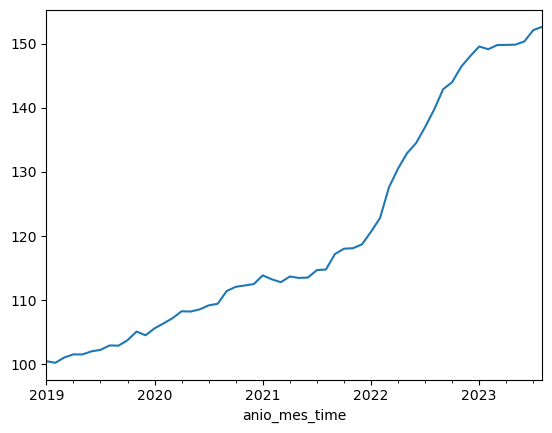

In [9]:
# graficar evolución del IPC de  alimentos

df[df['glosa'] == 'Alimentos']['indice'].plot()

# plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, '2019 1'),
  Text(1, 0, '2019 2'),
  Text(2, 0, '2019 3'),
  Text(3, 0, '2019 4'),
  Text(4, 0, '2019 5'),
  Text(5, 0, '2019 6'),
  Text(6, 0, '2019 7'),
  Text(7, 0, '2019 8'),
  Text(8, 0, '2019 9'),
  Text(9, 0, '2019 10'),
  Text(10, 0, '2019 11'),
  Text(11, 0, '2019 12'),
  Text(12, 0, '2020 1'),
  Text(13, 0, '2020 2'),
  Text(14, 0, '2020 3'),
  Text(15, 0, '2020 4'),
  Text(16, 0, '2020 5'),
  Text(17, 0, '2020 6'),
  Text(18, 0, '2020 7'),
  Text(19, 0, '2020 8'),
  Text(20, 0, '2020 9'),
  Text(21, 0, '2020 10'),
  Text(22, 0, '2020 11'),
  Text(23, 0, '2020 12'),
  Text(24, 0, '2021 1'),
  Text(25, 0, '2021 2'),
  Text(26, 0, '2021 3'),
  

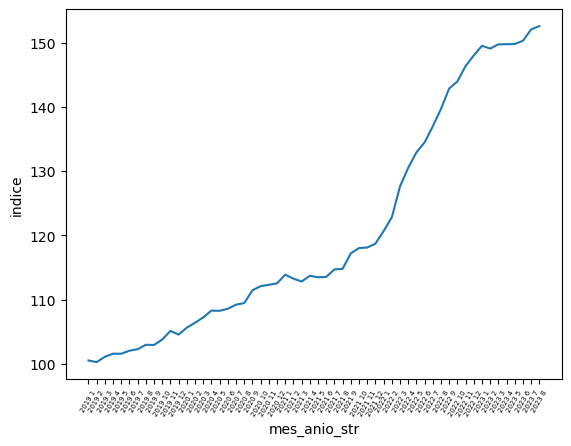

In [10]:
# ¿Cómo hubiese quedado si sólo usamos un barplot

# concatenar año mes como un str
df['mes_anio_str'] = df['anio'].astype('str')+" "+df['mes'].astype('str')

# Gráfico de línea
sns.lineplot(data=df[df['glosa'] == 'Alimentos'], x='mes_anio_str', y='indice')
# ajustar las etiquetas de x

plt.xticks(rotation=60, fontsize=5)

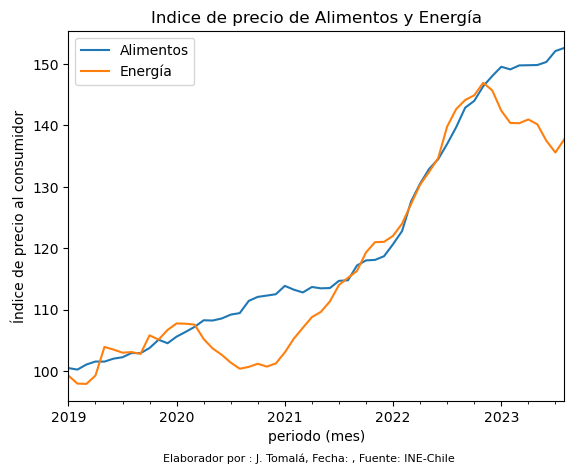

In [11]:
# Realiza dos series al mismo tiempo

import matplotlib.pyplot as plt

# plt.figure(figsize=(16,8))

df[df['glosa'] == 'Alimentos']['indice'].plot(label='Alimentos')
df[df['glosa'] == 'Energía']['indice'].plot(label='Energía')
plt.title("Indice de precio de Alimentos y Energía")
plt.xlabel("periodo (mes)")
plt.ylabel("Índice de precio al consumidor")
plt.suptitle(
    "Elaborador por : J. Tomalá, Fecha: , Fuente: INE-Chile", y=0, fontsize=8)
plt.legend()

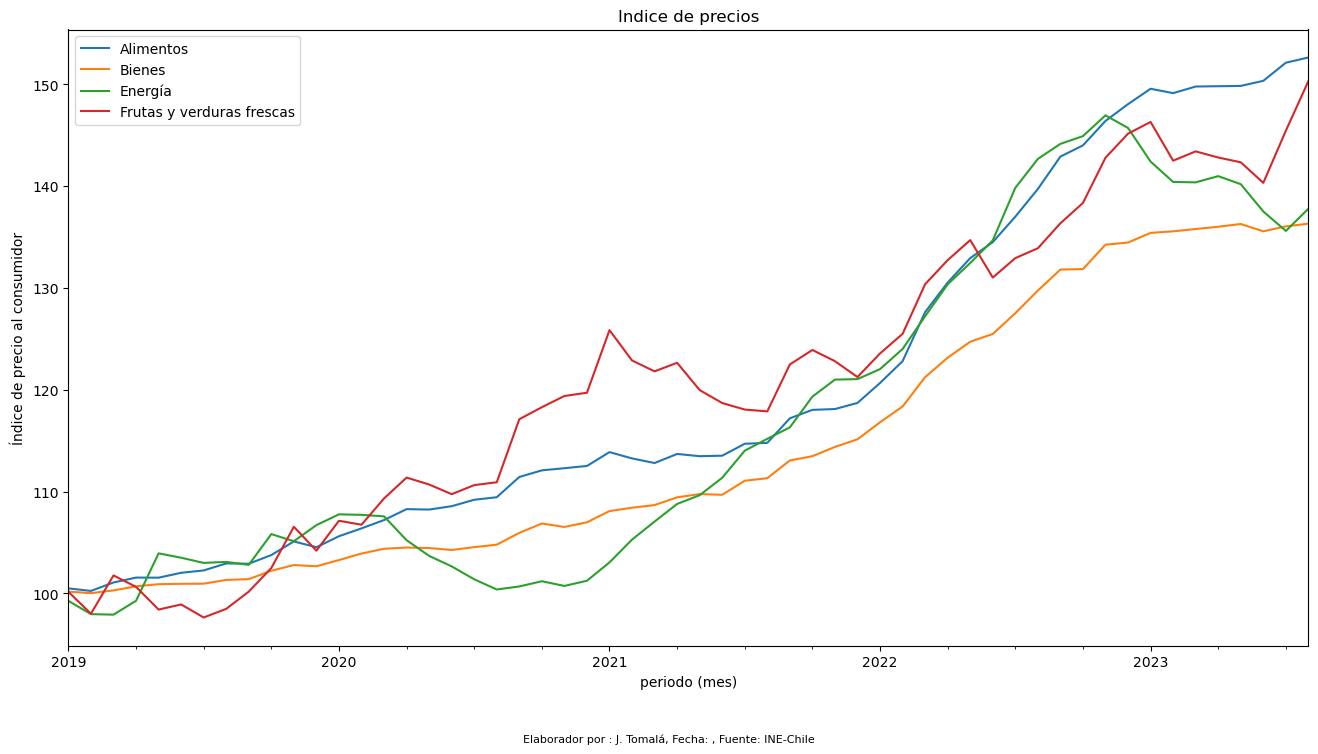

In [12]:
# Cómo lo haría para todas las siguientes glosas optimizando el código ?

glosas = ['Alimentos', 'Bienes', 'Energía', 'Frutas y verduras frescas']

plt.figure(figsize=(16, 8))

df[df['glosa'] == 'Alimentos']['indice'].plot(label='Alimentos')
df[df['glosa'] == 'Bienes']['indice'].plot(label='Bienes')
df[df['glosa'] == 'Energía']['indice'].plot(label='Energía')
df[df['glosa'] == 'Frutas y verduras frescas']['indice'].plot(
    label='Frutas y verduras frescas')
plt.title("Indice de precios")
plt.xlabel("periodo (mes)")
plt.ylabel("Índice de precio al consumidor")
plt.suptitle(
    "Elaborador por : J. Tomalá, Fecha: , Fuente: INE-Chile", y=0, fontsize=8)
plt.legend()

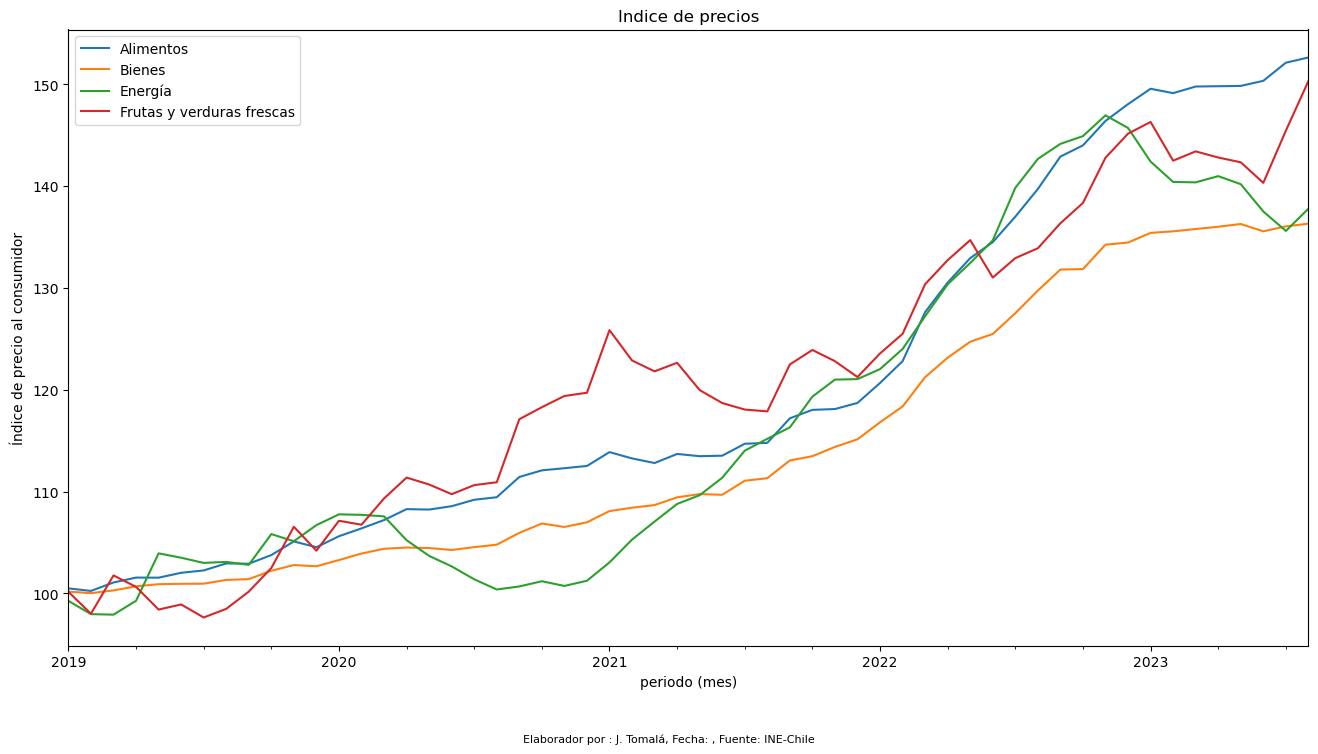

In [13]:
# esto es lo mismo de arriba pero 'resumido'

glosas = ['Alimentos', 'Bienes', 'Energía', 'Frutas y verduras frescas']

plt.figure(figsize=(16, 8))

for glosa in glosas:
    df[df['glosa'] == glosa]['indice'].plot(label=glosa)

plt.title("Indice de precios")
plt.xlabel("periodo (mes)")
plt.ylabel("Índice de precio al consumidor")
plt.suptitle(
    "Elaborador por : J. Tomalá, Fecha: , Fuente: INE-Chile", y=0, fontsize=8)
plt.legend()